<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

<a target="_blank" href="https://colab.research.google.com/github/CienciaDeDatosEspacial/TheThematics/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Thematic map

Last session we created a file with several layers:

In [329]:
import geopandas as gpd

linkGit='https://github.com/DataFab18/ExamenTest/raw/refs/heads/main/'
linkWorldMaps='worldMaps.gpkg'

we can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [330]:
gpd.list_layers(linkGit+linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [337]:
countries=gpd.read_file(linkGit+linkWorldMaps,layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [339]:
import pandas as pd

someDataLink='TelefonesCelular1.csv'

someData = pd.read_csv(linkGit+someDataLink, on_bad_lines='skip')

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              219 non-null    object
 1   slug                 219 non-null    object
 2   value                219 non-null    int64 
 3   date_of_information  219 non-null    int64 
 4   ranking              219 non-null    int64 
 5   region               219 non-null    object
dtypes: int64(3), object(3)
memory usage: 10.4+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [340]:
someData.head()

,Country,slug,value,date_of_information,ranking,region
0,China,china,1810000000,2023,1,East and Southeast Asia
1,India,india,1140000000,2022,2,South Asia
2,United States,united-states,386000000,2023,3,North America
3,Indonesia,indonesia,352000000,2023,4,East and Southeast Asia
4,Russia,russia,245000000,2022,5,Central Asia


Preparing thematic maps requires **social data** _about_ the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

### Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [341]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [342]:
someData.Country.head()

,Country
0,China
1,India
2,United States
3,Indonesia
4,Russia


Let's solve the _country name_ differences for the KEYs:

In [343]:
countries.rename(columns={'COUNTRY':'Country'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [344]:
countries['Country']=countries['Country'].str.upper()

It is very unlikely the names are written the same. Let's verify:

In [345]:
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

Check here:

In [346]:
onlyDF # they did not find a match in the MAP GDF!

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo Republic of the',
 'CongoDemocratic Republic of the',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands (Islas Malvinas)',
 'Faroe Isla

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz** (based on the [Levenshtein algorithm](https://en.wikipedia.org/wiki/Levenshtein_distance)):

In [347]:
!pip install thefuzz

This is the basic idea:

In [348]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('Albania',onlyGDF)

('ALBANIA', 100)

As you see, you get a coefficient value of 90 (the closer to 100 the better). That may be a reliable result.

Let's do the same for all the unmatched countries:

In [349]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(country, best(country,onlyGDF)) for country in onlyDF]

[('Guernsey', ('GUERNSEY (UK)', 90)),
 ('Puerto Rico', ('PUERTO RICO (US)', 95)),
 ('Syria', ('SYRIA', 100)),
 ('Kyrgyzstan', ('KYRGYZSTAN', 100)),
 ('Sint Maarten', ('SPAIN', 68)),
 ('Qatar', ('QATAR', 100)),
 ('Philippines', ('PHILIPPINES', 100)),
 ('Iceland', ('ICELAND', 100)),
 ('Argentina', ('ARGENTINA', 100)),
 ('Laos', ('LAOS', 100)),
 ('Pakistan', ('PAKISTAN', 100)),
 ('Zimbabwe', ('ZIMBABWE', 100)),
 ('Guinea', ('GUINEA', 100)),
 ('Cameroon', ('CAMEROON', 100)),
 ('Seychelles', ('SEYCHELLES', 100)),
 ('British Virgin Islands', ('BRITISH VIRGIN ISLANDS(UK)', 95)),
 ('Sudan', ('SUDAN', 100)),
 ('Somalia', ('SOMALIA', 100)),
 ('Cayman Islands', ('CAYMAN ISLANDS (UK)', 95)),
 ('Costa Rica', ('COSTA RICA', 100)),
 ('South Sudan', ('SOUTH SUDAN', 100)),
 ('Trinidad and Tobago', ('TRINIDAD AND TOBAGO', 100)),
 ('Sweden', ('SWEDEN', 100)),
 ('Portugal', ('PORTUGAL', 100)),
 ('Honduras', ('HONDURAS', 100)),
 ('Jamaica', ('JAMAICA', 100)),
 ('Iraq', ('IRAQ', 100)),
 ('Croatia', ('CROATI

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [350]:
#or
[(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]

[('Guernsey', 'GUERNSEY (UK)', 90),
 ('Puerto Rico', 'PUERTO RICO (US)', 95),
 ('Syria', 'SYRIA', 100),
 ('Kyrgyzstan', 'KYRGYZSTAN', 100),
 ('Sint Maarten', 'SPAIN', 68),
 ('Qatar', 'QATAR', 100),
 ('Philippines', 'PHILIPPINES', 100),
 ('Iceland', 'ICELAND', 100),
 ('Argentina', 'ARGENTINA', 100),
 ('Laos', 'LAOS', 100),
 ('Pakistan', 'PAKISTAN', 100),
 ('Zimbabwe', 'ZIMBABWE', 100),
 ('Guinea', 'GUINEA', 100),
 ('Cameroon', 'CAMEROON', 100),
 ('Seychelles', 'SEYCHELLES', 100),
 ('British Virgin Islands', 'BRITISH VIRGIN ISLANDS(UK)', 95),
 ('Sudan', 'SUDAN', 100),
 ('Somalia', 'SOMALIA', 100),
 ('Cayman Islands', 'CAYMAN ISLANDS (UK)', 95),
 ('Costa Rica', 'COSTA RICA', 100),
 ('South Sudan', 'SOUTH SUDAN', 100),
 ('Trinidad and Tobago', 'TRINIDAD AND TOBAGO', 100),
 ('Sweden', 'SWEDEN', 100),
 ('Portugal', 'PORTUGAL', 100),
 ('Honduras', 'HONDURAS', 100),
 ('Jamaica', 'JAMAICA', 100),
 ('Iraq', 'IRAQ', 100),
 ('Croatia', 'CROATIA', 100),
 ('Djibouti', 'DJIBOUTI', 100),
 ('Spain', 'S

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [351]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF])

,0,1,2
0,Guernsey,GUERNSEY (UK),90
1,Puerto Rico,PUERTO RICO (US),95
2,Syria,SYRIA,100
3,Kyrgyzstan,KYRGYZSTAN,100
4,Sint Maarten,SPAIN,68
...,...,...,...
214,Moldova,MOLDOVA,100
215,Burundi,BURUNDI,100
216,Antigua and Barbuda,ANTIGUA AND BARBUDA,100
217,Saint Kitts and Nevis,ST. KITTS AND NEVIS,90


Let's sort by the column '2' (the third):

In [352]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
182,Kosovo,SOLOMON ISLANDS,54
136,West Bank,CUBA,57
90,Gaza Strip,GHANA,60
76,Cote d'Ivoire,IVORY COAST,63
123,Eswatini,INDIA,68
...,...,...,...
210,Venezuela,VENEZUELA,100
209,Mozambique,MOZAMBIQUE,100
215,Burundi,BURUNDI,100
214,Moldova,MOLDOVA,100


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [353]:
countries.Country[countries.Country.str.contains('LAOS|SAMOA|BURMA')]

,Country
9,AMERICAN SAMOA (US)
126,LAOS
242,WESTERN SAMOA


Then, it makes sense to change those manually (notice the 'replace' uses Python dictionaries):

In [354]:
  # this is a {dictionary}

manualChanges={'TurksandCaicosIslands':'TURKS AND CAICOS ISLANDS (UK)',
               'SaintVincentandtheGrenadines':'ST. VINCENT AND THE GRENADINES',
               'NorthernMarianaIslands':'NORTHERN MARIANA ISLANDS (US)',
               'Czechia':'CZECH REPUBLIC',
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [355]:
#updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

An re run this code:

In [356]:
# keeping high scores

pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(2)

,0,1,2
182,Kosovo,SOLOMON ISLANDS,54
136,West Bank,CUBA,57
90,Gaza Strip,GHANA,60
76,Cote d'Ivoire,IVORY COAST,63
123,Eswatini,INDIA,68
...,...,...,...
210,Venezuela,VENEZUELA,100
209,Mozambique,MOZAMBIQUE,100
215,Burundi,BURUNDI,100
214,Moldova,MOLDOVA,100


All this is correct now!

Let's prepare the changes:

In [357]:
# new {dictionary}
changesToDF={country: best(country,onlyGDF)[0] for country in onlyDF}
changesToDF

{'Guernsey': 'GUERNSEY (UK)',
 'Puerto Rico': 'PUERTO RICO (US)',
 'Syria': 'SYRIA',
 'Kyrgyzstan': 'KYRGYZSTAN',
 'Sint Maarten': 'SPAIN',
 'Qatar': 'QATAR',
 'Philippines': 'PHILIPPINES',
 'Iceland': 'ICELAND',
 'Argentina': 'ARGENTINA',
 'Laos': 'LAOS',
 'Pakistan': 'PAKISTAN',
 'Zimbabwe': 'ZIMBABWE',
 'Guinea': 'GUINEA',
 'Cameroon': 'CAMEROON',
 'Seychelles': 'SEYCHELLES',
 'British Virgin Islands': 'BRITISH VIRGIN ISLANDS(UK)',
 'Sudan': 'SUDAN',
 'Somalia': 'SOMALIA',
 'Cayman Islands': 'CAYMAN ISLANDS (UK)',
 'Costa Rica': 'COSTA RICA',
 'South Sudan': 'SOUTH SUDAN',
 'Trinidad and Tobago': 'TRINIDAD AND TOBAGO',
 'Sweden': 'SWEDEN',
 'Portugal': 'PORTUGAL',
 'Honduras': 'HONDURAS',
 'Jamaica': 'JAMAICA',
 'Iraq': 'IRAQ',
 'Croatia': 'CROATIA',
 'Djibouti': 'DJIBOUTI',
 'Spain': 'SPAIN',
 'Albania': 'ALBANIA',
 'Suriname': 'SURINAME',
 'Uganda': 'UGANDA',
 'Curacao': 'CURACAO (NETHERLANDS)',
 'Anguilla': 'ANGUILLA (UK)',
 'Nigeria': 'NIGERIA',
 'France': 'FRANCE',
 'Nauru': 'N

In [361]:
someData.replace(to_replace={'Country':changesToDF},inplace=True)

What is left to match?

In [360]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [362]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='Country')

And our GDF has social data now!

In [363]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              219 non-null    object  
 1   geometry             219 non-null    geometry
 2   slug                 219 non-null    object  
 3   value                219 non-null    int64   
 4   date_of_information  219 non-null    int64   
 5   ranking              219 non-null    int64   
 6   region               219 non-null    object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 12.1+ KB


We should save this map of countries and their indicators in a new file:

In [364]:
theMapAndData.to_file("worldindicators.json")

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use dot to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's keep Africa:

In [365]:
theMapAndData.Country.value_counts()

,count
Country,
SPAIN,3
CONGO,2
AMERICAN SAMOA (US),2
GHANA,2
CUBA,2
...,...
ZIMBABWE,1
SOUTH SUDAN,1
INDONESIA,1


### Preprocessing: Filtering

<Axes: >

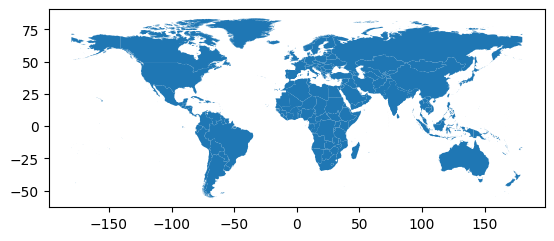

In [366]:
# then
#Africa.plot()
#Africa=theMapAndData[theMapAndData.region=='Africa']
theMapAndData.plot()


A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

* Dot Unit: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

The size of all dots on the map must be the same to ensure a consistent visual comparison.

### Preprocessing: aggregating

This is a DOT UNIT proposal:

In [367]:
justDots=theMapAndData.copy()
dot_value = 100000
justDots['num_dots'] = (justDots['value'] / dot_value).astype(int)

### Preprocessing: distributing dots

And here, we get a location for the dots:

In [368]:
# 2. Generate the random dot locations using .sample_points()
justDots = justDots.sample_points(size=justDots['num_dots']).explode(index_parts=True)

You get this:

In [369]:
justDots

0    0     POINT (-70.01812 12.59658)
1    0     POINT (-61.78638 17.15108)
2    0      POINT (60.66049 34.03964)
     1       POINT (60.6645 32.97617)
     2      POINT (60.85558 33.06412)
                      ...            
217  11    POINT (126.16832 -8.51597)
     12    POINT (126.33703 -8.49221)
     13    POINT (126.50532 -8.84939)
     14     POINT (127.2282 -8.48677)
218  0     POINT (-68.91562 12.14115)
Name: sampled_points, Length: 87014, dtype: geometry

In [370]:
# what is it?
type(justDots)

geopandas.geoseries.GeoSeries

### Preprocessing: building GDF from GS

Notice the multi index (MI), one for a country and for a dot. As we are planing to send these points to R, we avoid MI:

In [371]:
justDots.reset_index(drop=True, inplace=True)
theMapAndData_dots=gpd.GeoDataFrame(geometry=justDots)
theMapAndData_dots

,geometry
0,POINT (-70.01812 12.59658)
1,POINT (-61.78638 17.15108)
2,POINT (60.66049 34.03964)
3,POINT (60.6645 32.97617)
4,POINT (60.85558 33.06412)
...,...
87009,POINT (126.16832 -8.51597)
87010,POINT (126.33703 -8.49221)
87011,POINT (126.50532 -8.84939)
87012,POINT (127.2282 -8.48677)


Now you have a GDF:

In [372]:
theMapAndData_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87014 entries, 0 to 87013
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  87014 non-null  geometry
dtypes: geometry(1)
memory usage: 679.9 KB


Juts plot the polygons as the base, and the points as the layer on top!

<Axes: >

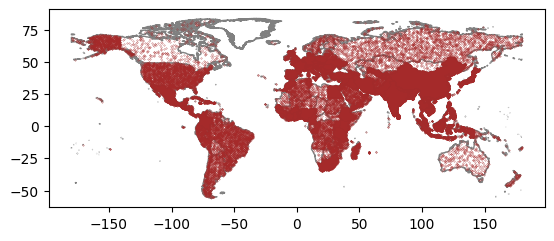

In [373]:
base=theMapAndData.plot(facecolor="white",#color of polygon fill
               edgecolor='grey') #color of border
theMapAndData_dots.plot(markersize=0.05, color='brown',ax=base)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

<Axes: >

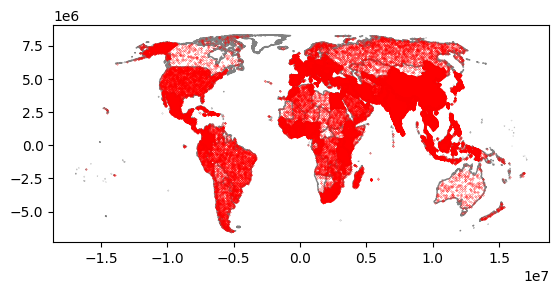

In [374]:
base=theMapAndData.to_crs(8857).plot(facecolor="white",
                              edgecolor='grey')
theMapAndData_dots.to_crs(8857).plot(markersize=0.05, color='red',ax=base)

Let's keep the continent countries with that crs:

In [375]:
theMapAndData_8857=theMapAndData.to_crs(8857)
theMapAndData_dots_8857=theMapAndData_dots.to_crs(8857)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: GDF of centroids

1. A location for a symbol, generally the polygon centroid.

In [376]:
theMapAndData_8857_centroids = theMapAndData_8857.copy()

# Africa_8857_centroids will have a new geometry:
theMapAndData_8857_centroids['geometry'] = theMapAndData_8857_centroids['geometry'].centroid

2. A size of varying values (not constant as in DDMs). Let's use population again.

In [377]:
theMapAndData_8857_centroids['size'] = theMapAndData_8857_centroids['value'].apply(lambda x: x**0.5/100)

## or
# import numpy as np
# Africa_8857_centroids['size'] = Africa_8857_centroids['population'].apply(lambda x: np.log10(x))

We got the basics, then:

<Axes: >

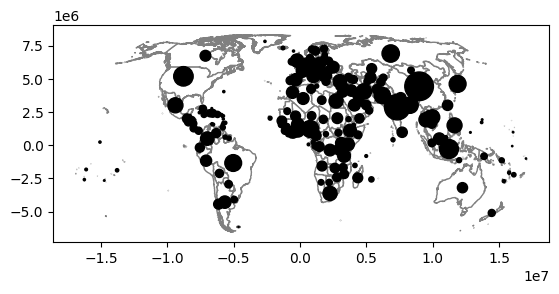

In [378]:
base=theMapAndData_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
theMapAndData_8857_centroids.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids['size'],
    color='black'
)

Keep in mind that the standard way of computing centroids may bring some trouble. Let´s plot Seychelles:

In [379]:
!pip install mapclassify

In [381]:
base=theMapAndData_8857[theMapAndData_8857.Country=="SEYCHELLES"].explore() #Con explore te hace un mapa interativo
theMapAndData_8857_centroids[theMapAndData_8857_centroids.Country=="SEYCHELLES"].explore(m=base,color="red")

A good alternative to centroids is representative_point() when dealing with complex multipolygons.

In [382]:
# replace the points: busca que el centroide caiga en tierra
theMapAndData_8857_centroids["geometry"]=theMapAndData_8857.representative_point()

We will keep that last result.

In [383]:
base=theMapAndData_8857[theMapAndData_8857.Country=="SEYCHELLES"].explore()
theMapAndData_8857_centroids[theMapAndData_8857_centroids.Country=="SEYCHELLES"].explore(m=base,color="red")

### Preprocessing: Computing new columns

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As, human eyes are very limited to detect area differences, we may need to use some other tactics to help uncover some patterns.

For example, let's confirm if we have outliers:

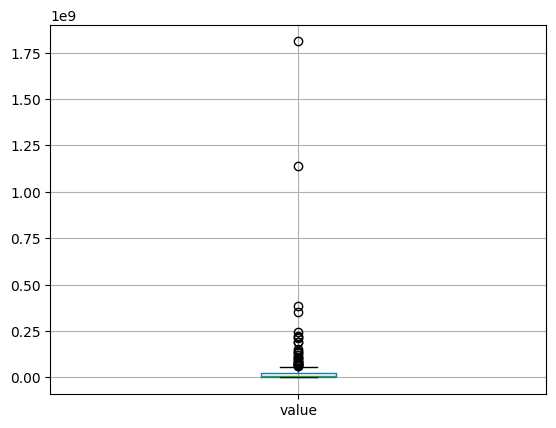

In [384]:
boxplotInfo=theMapAndData_8857_centroids.boxplot(column='value',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [385]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([62700000, 191000000, 213000000, 1810000000, 87400000, 106000000,
       71400000, 77400000, 105000000, 1140000000, 151000000, 78500000,
       219000000, 66700000, 140000000, 224000000, 189000000, 135000000,
       245000000, 108000000, 61200000, 121000000, 92200000, 70200000,
       84300000, 386000000, 65500000, 131000000, 352000000], dtype=object)

Then, these are the outlying countries:

In [386]:
theMapAndData_8857_centroids[theMapAndData_8857_centroids.value.isin(outliers)]

,Country,geometry,slug,value,date_of_information,ranking,region,size
11,ARGENTINA,POINT (-5553772.712 -4493827.822),argentina,62700000,2023,29,South America,79.183332
20,BANGLADESH,POINT (8263696.591 2996813.07),bangladesh,191000000,2023,9,South Asia,138.202750
28,BRAZIL,POINT (-4700709.502 -1764170.762),brazil,213000000,2023,8,South America,145.945195
40,CHINA,POINT (8558589.424 4454406.546),china,1810000000,2023,1,East and Southeast Asia,425.440948
45,COLOMBIA,POINT (-6936232.356 525486.665),colombia,87400000,2023,20,South America,93.487967
59,EGYPT,POINT (2678759.188 3375702.424),egypt,106000000,2023,17,Africa,102.956301
65,ETHIOPIA,POINT (3713238.555 1171240.545),ethiopia,71400000,2022,25,Africa,84.498521
72,FRANCE,POINT (175396.764 5637422.087),france,77400000,2023,24,Europe,87.977270
81,GERMANY,POINT (820014.651 6093052.18),germany,105000000,2023,18,Europe,102.469508
92,INDIA,POINT (7400087.029 2723625.672),india,1140000000,2022,2,South Asia,337.638860


Knowing this information, we can create a column as outlier flag:

In [387]:
theMapAndData_8857_centroids['value_outlier']=theMapAndData_8857_centroids.value.isin(outliers)*1

## see
theMapAndData_8857_centroids

,Country,geometry,slug,value,date_of_information,ranking,region,size,value_outlier
0,ARUBA (NETHERLANDS),POINT (-6627435.863 1600262.217),aruba,141000,2021,188,Central America and the Caribbean,3.754997,0
1,ANTIGUA AND BARBUDA,POINT (-5794568.997 2176408.939),antigua-and-barbuda,184000,2021,183,Central America and the Caribbean,4.289522,0
2,AFGHANISTAN,POINT (5737749.881 4223784.83),afghanistan,23000000,2023,59,South Asia,47.958315,0
3,ALGERIA,POINT (58149.408 3504624.452),algeria,51500000,2023,35,Africa,71.763500,0
4,AZERBAIJAN,POINT (4052504.835 4936297.741),azerbaijan,11000000,2023,91,Central Asia,33.166248,0
...,...,...,...,...,...,...,...,...,...
214,ZIMBABWE,POINT (2738721.618 -2417820.45),zimbabwe,15000000,2023,72,Africa,38.729833,0
215,SOUTH SUDAN,POINT (2780382.012 1002979.353),south-sudan,6170000,2023,118,Africa,24.839485,0
216,INDONESIA,POINT (10855969.809 11510.466),indonesia,352000000,2023,4,East and Southeast Asia,187.616630,1
217,EAST TIMOR,POINT (11979482.349 -1139940.313),timor-leste,1560000,2023,158,East and Southeast Asia,12.489996,0


We can use that like this:

<Axes: >

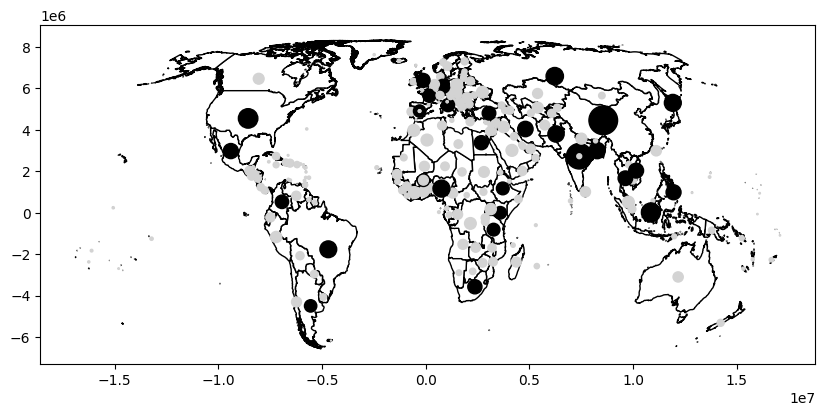

In [388]:
base = theMapAndData_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'black', 0: 'lightgrey'}

# Plot the centroids on top
theMapAndData_8857_centroids.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids['size'],
    color=theMapAndData_8857_centroids['value_outlier'].map(mapcolor)
)

Here, we do a good job for outliers, but it is difficult to interprete the other ones. We could use some redundancy, but more work is needed:
1. Create two maps of centroids:

In [389]:
# Create explicit copies of the DataFrames
theMapAndData_8857_centroids_out = theMapAndData_8857_centroids[theMapAndData_8857_centroids.value_outlier==1].copy()
theMapAndData_8857_centroids_no_out = theMapAndData_8857_centroids[theMapAndData_8857_centroids.value_outlier==0].copy()


2. Compute sizes in each:

In [390]:
theMapAndData_8857_centroids_out['size'] = theMapAndData_8857_centroids_out['value'].apply(lambda x: x**0.5 / 50)
theMapAndData_8857_centroids_no_out['size'] = theMapAndData_8857_centroids_no_out['value'].apply(lambda x: x**0.5 / 50)

Now, plot the three layers, using some color gradient for the non-outliers:

<Axes: >

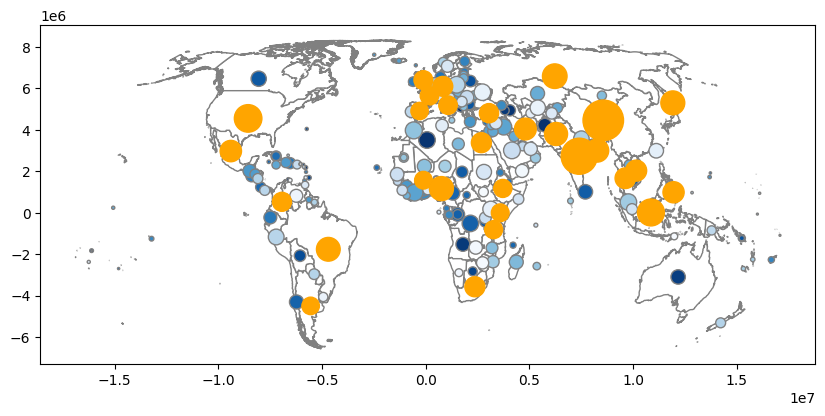

In [391]:
base=theMapAndData_8857.plot(color='white', edgecolor='grey',figsize=(10,10))

theMapAndData_8857_centroids_no_out.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids_no_out['size'],
    edgecolor='grey',
    c=theMapAndData_8857_centroids_no_out['size'],
    cmap='Blues_r'
)
theMapAndData_8857_centroids_out.plot(
    ax=base,
    markersize=theMapAndData_8857_centroids_out['size'],
    color='orange'
)

In [393]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              219 non-null    object  
 1   geometry             219 non-null    geometry
 2   slug                 219 non-null    object  
 3   value                219 non-null    int64   
 4   date_of_information  219 non-null    int64   
 5   ranking              219 non-null    int64   
 6   region               219 non-null    object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 12.1+ KB


# Thematics: Choropleths

Notice that the DDMs may use aggregated counts, and the PSMs use the variables in its original form. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

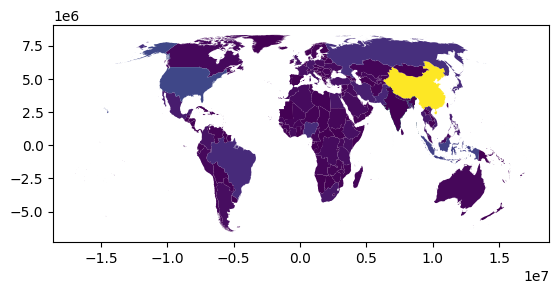

In [394]:
theMapAndData_8857.plot(theMapAndData_8857.value)

* This **IS** a choropleth:

<Axes: >

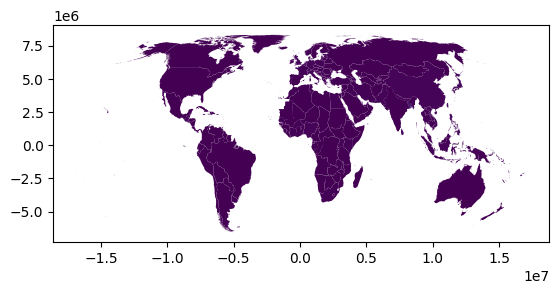

In [395]:
theMapAndData_8857.plot(theMapAndData_8857.value/theMapAndData_8857.area)

Choropleths are great to represent normalized indicators such as:
* Densities
* Ratios
* Rates
* Averages

Population by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be
that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.

### Preprocessing: Discretizing

Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [396]:
## do you have these installed?
! pip show numba mapclassify numpy

Name: numba
Version: 0.60.0
Summary: compiling Python code using LLVM
Home-page: https://numba.pydata.org
Author: 
Author-email: 
License: BSD
Location: /usr/local/lib/python3.12/dist-packages
Requires: llvmlite, numpy
Required-by: cudf-cu12, cuml-cu12, dask-cuda, distributed-ucxx-cu12, librosa, numba-cuda, pynndescent, shap, stumpy, umap-learn
---
Name: mapclassify
Version: 2.10.0
Summary: Classification Schemes for Choropleth Maps.
Home-page: 
Author: 
Author-email: 
License: BSD 3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: networkx, numpy, pandas, scikit-learn, scipy
Required-by: 
---
Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are
met:


We will discretize this:

In [397]:
theMapAndData_8857['value_density']=theMapAndData_8857.value/theMapAndData_8857.area

Let's explore the bining algorithms:

In [398]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData_8857['value_density']
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [399]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

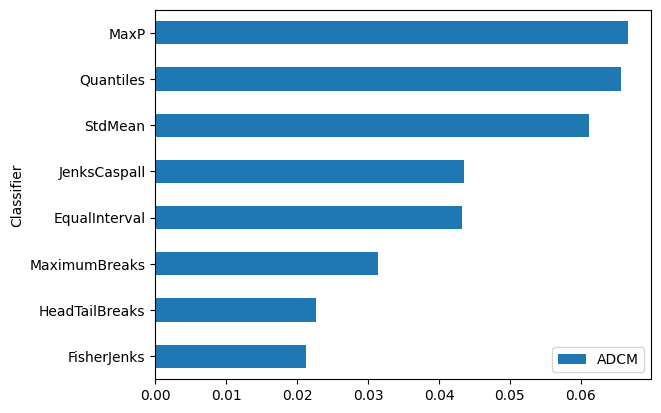

In [400]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [401]:
theMapAndData_8857['value_density_FJ5'] = fj5.yb #Lo guardo

In [402]:
# there you are
theMapAndData_8857[['value_density','value_density_FJ5']].head(20)

,value_density,value_density_FJ5
0,0.000707,1
1,0.000343,0
2,0.000036,0
3,0.000022,0
4,0.000128,0
5,0.000091,0
6,0.000133,0
7,0.000248,0
8,0.000021,0
9,0.000818,1


We could create a copy of the bins to add labels:

In [403]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

theMapAndData_8857['value_density_FJ5_cat']=theMapAndData_8857.loc[:,'value_density_FJ5'].replace(newLabelsForLevels)

# we have
theMapAndData_8857[['value_density','value_density_FJ5','value_density_FJ5_cat']].head(20)

,value_density,value_density_FJ5,value_density_FJ5_cat
0,0.000707,1,1_Low
1,0.000343,0,0_VeryLow
2,0.000036,0,0_VeryLow
3,0.000022,0,0_VeryLow
4,0.000128,0,0_VeryLow
5,0.000091,0,0_VeryLow
6,0.000133,0,0_VeryLow
7,0.000248,0,0_VeryLow
8,0.000021,0,0_VeryLow
9,0.000818,1,1_Low


We are ready for a discrete choropleth:

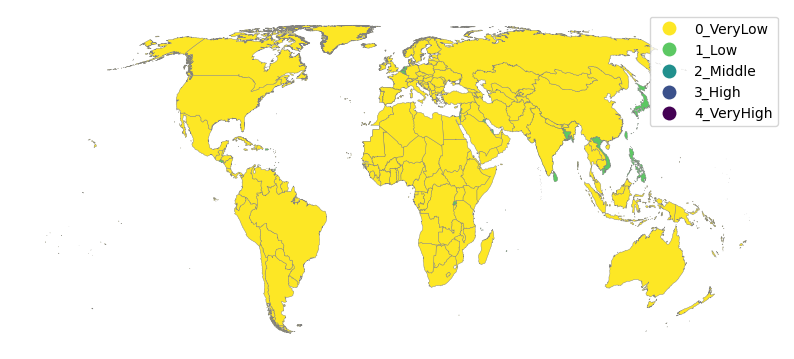

In [404]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData_8857.plot(column='value_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save this maps for R.

In [405]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_4
theMapAndData
Africa
_38
Africa_dots
_69
Africa_8857
Africa_dots_8857
Africa_8857_centroids
_83
_84
Africa_8857_centroids_out
Africa_8857_centroids_no_out
theMapAndData_dots
_142
theMapAndData_8857
theMapAndData_dots_8857
theMapAndData_8857_centroids
_158
_159
theMapAndData_8857_centroids_out
theMapAndData_8857_centroids_no_out
_195
_207
_219
_226
_247
_331
_337
_371
_386
_387


These are the ones needed in R:

In [406]:
# for choropleth and base map
theMapAndData_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Country                219 non-null    object  
 1   geometry               219 non-null    geometry
 2   slug                   219 non-null    object  
 3   value                  219 non-null    int64   
 4   date_of_information    219 non-null    int64   
 5   ranking                219 non-null    int64   
 6   region                 219 non-null    object  
 7   value_density          219 non-null    float64 
 8   value_density_FJ5      219 non-null    int64   
 9   value_density_FJ5_cat  219 non-null    object  
dtypes: float64(1), geometry(1), int64(4), object(4)
memory usage: 17.2+ KB


In [407]:
# for DDMs
theMapAndData_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87014 entries, 0 to 87013
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  87014 non-null  geometry
dtypes: geometry(1)
memory usage: 679.9 KB


In [408]:
# for PSMs
theMapAndData_8857_centroids.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              219 non-null    object  
 1   geometry             219 non-null    geometry
 2   slug                 219 non-null    object  
 3   value                219 non-null    int64   
 4   date_of_information  219 non-null    int64   
 5   ranking              219 non-null    int64   
 6   region               219 non-null    object  
 7   size                 219 non-null    float64 
 8   value_outlier        219 non-null    int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 15.5+ KB


In [409]:
# for PSMs
theMapAndData_8857_centroids_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 29 entries, 11 to 216
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              29 non-null     object  
 1   geometry             29 non-null     geometry
 2   slug                 29 non-null     object  
 3   value                29 non-null     int64   
 4   date_of_information  29 non-null     int64   
 5   ranking              29 non-null     int64   
 6   region               29 non-null     object  
 7   size                 29 non-null     float64 
 8   value_outlier        29 non-null     int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 2.3+ KB


In [410]:
# for PSMs
theMapAndData_8857_centroids_no_out.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 190 entries, 0 to 218
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Country              190 non-null    object  
 1   geometry             190 non-null    geometry
 2   slug                 190 non-null    object  
 3   value                190 non-null    int64   
 4   date_of_information  190 non-null    int64   
 5   ranking              190 non-null    int64   
 6   region               190 non-null    object  
 7   size                 190 non-null    float64 
 8   value_outlier        190 non-null    int64   
dtypes: float64(1), geometry(1), int64(4), object(3)
memory usage: 14.8+ KB


The file **theMapAndData_8857.gpkg** will keep all those maps as layers!

In [411]:
theMapAndData_8857.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='continent')
theMapAndData_dots_8857.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='value_ddm')
theMapAndData_8857_centroids.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='value_psm')
theMapAndData_8857_centroids_out.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='outlier_value_psm')
theMapAndData_8857_centroids_no_out.to_file("theMapAndData_8857.gpkg",driver='GPKG',layer='no_outlier_value_psm')